Early stopping at epoch 362


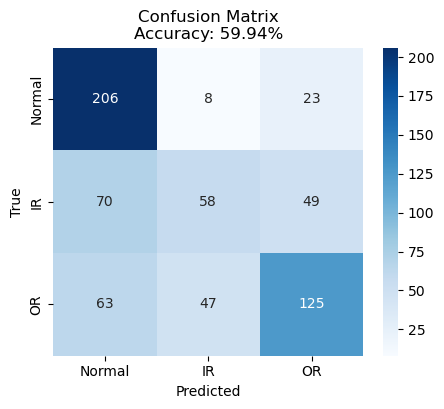

 - Model accuracy: 59.94%


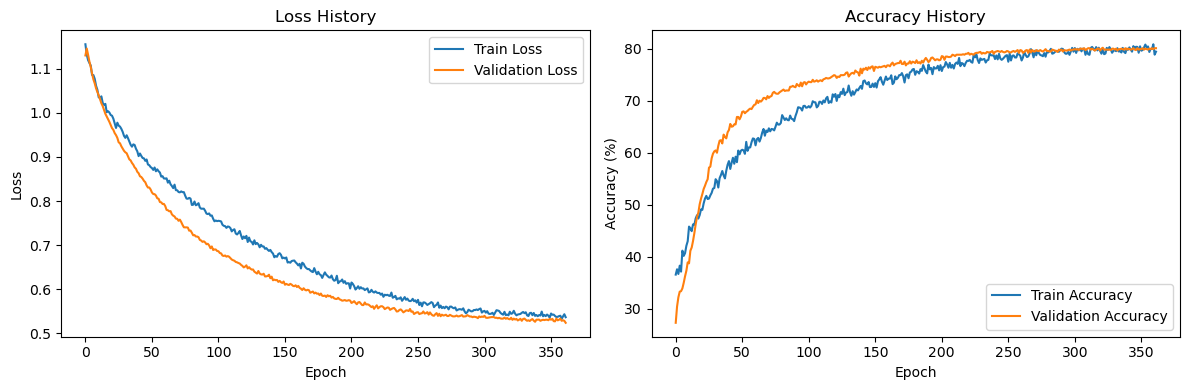

Early stopping at epoch 346


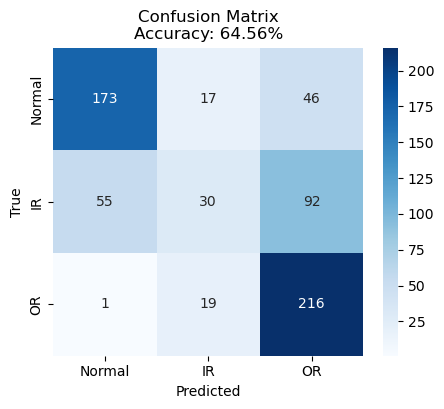

 - Model accuracy: 64.56%


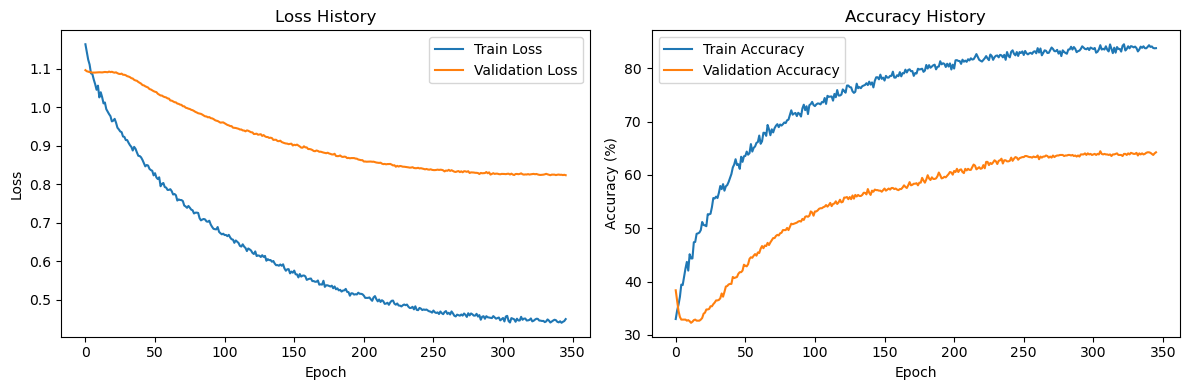

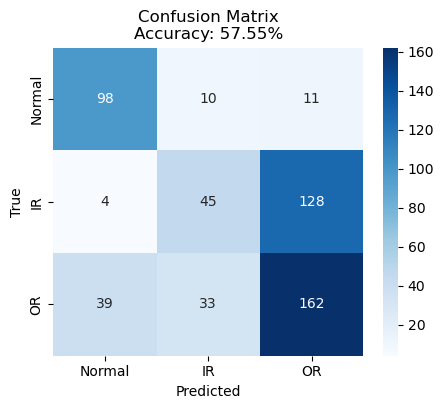

 - Model accuracy: 57.55%


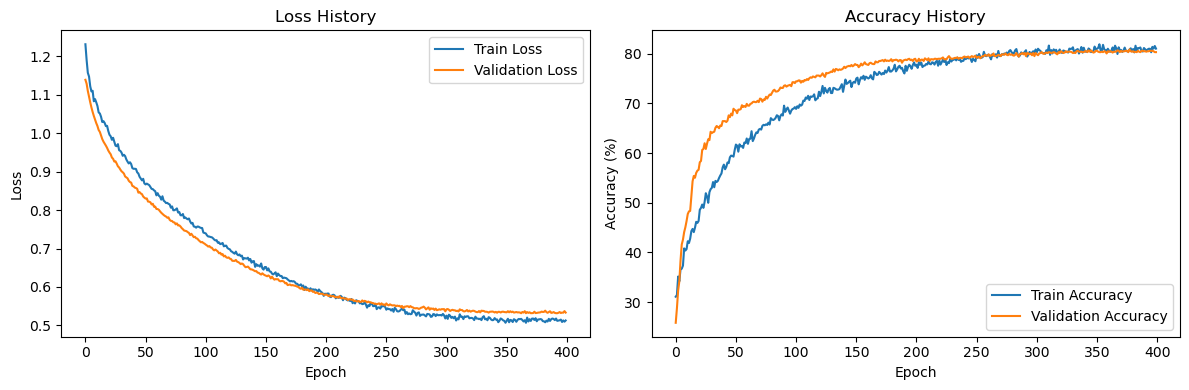

Early stopping at epoch 331


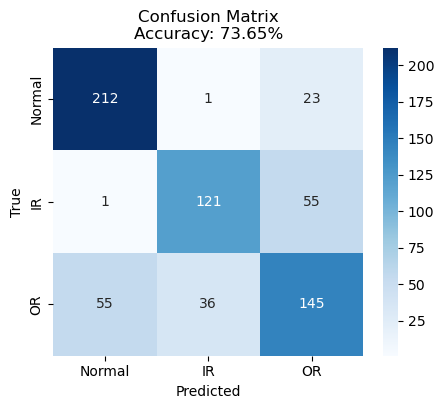

 - Model accuracy: 73.65%


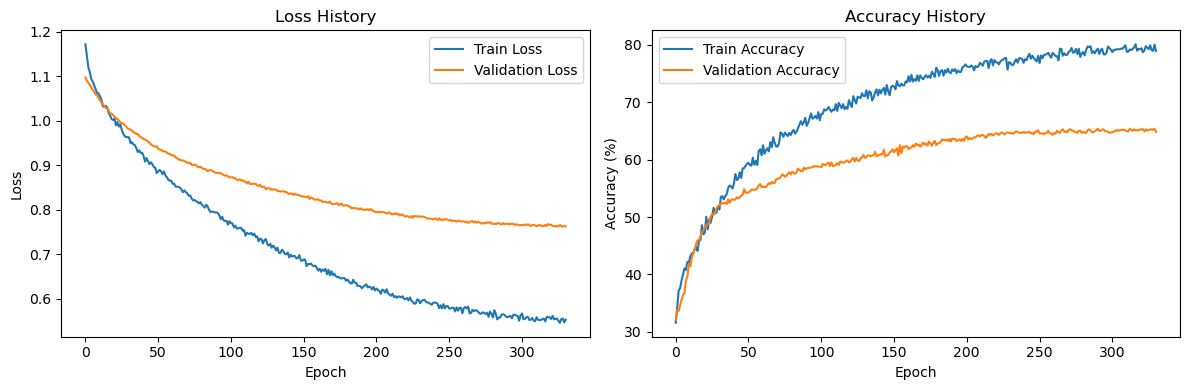

Early stopping at epoch 349


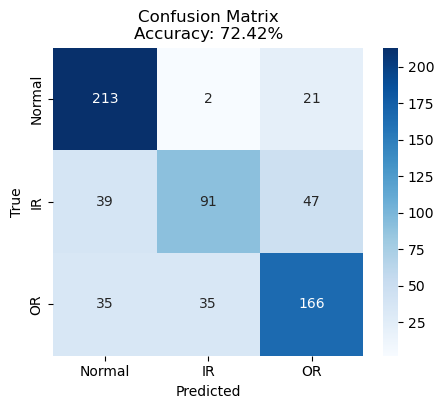

 - Model accuracy: 72.42%


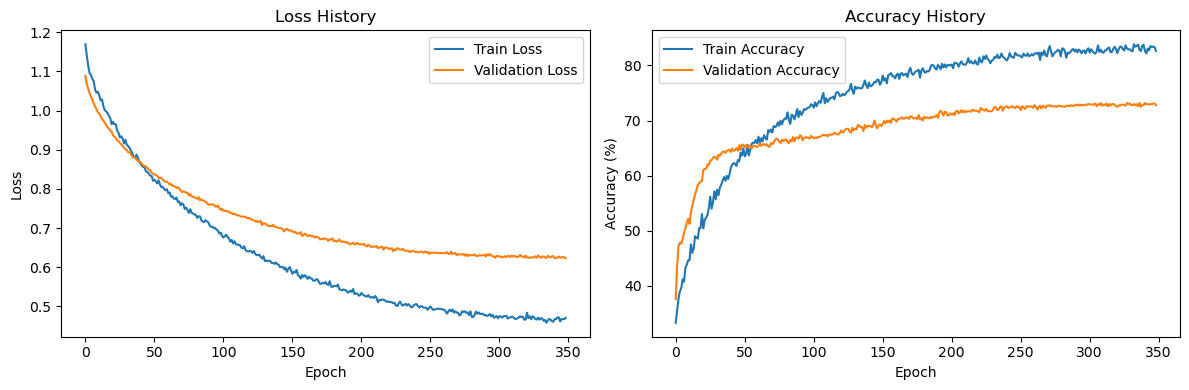

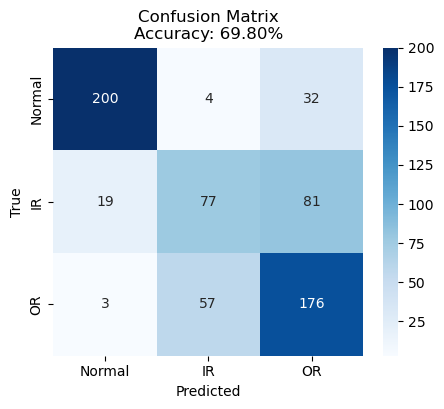

 - Model accuracy: 69.80%


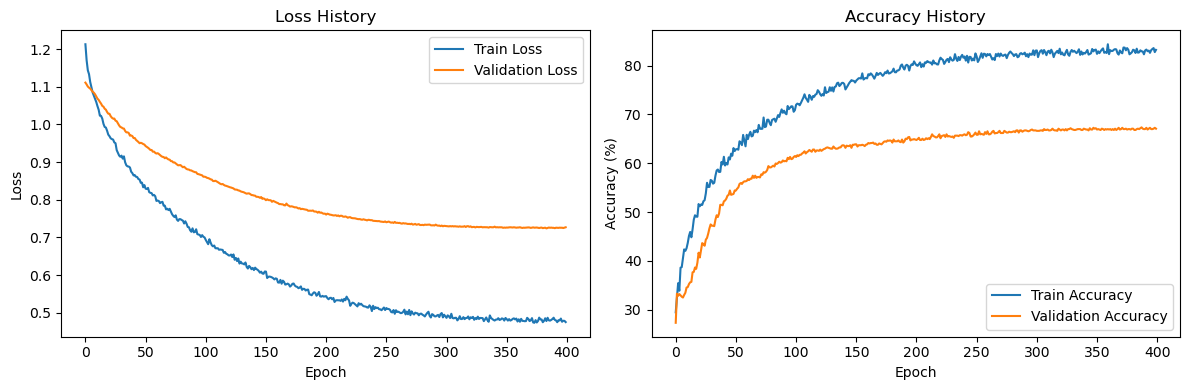

Early stopping at epoch 336


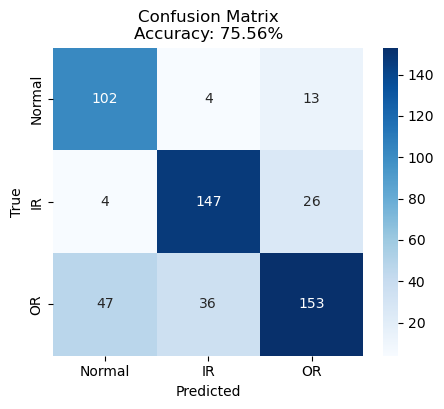

 - Model accuracy: 75.56%


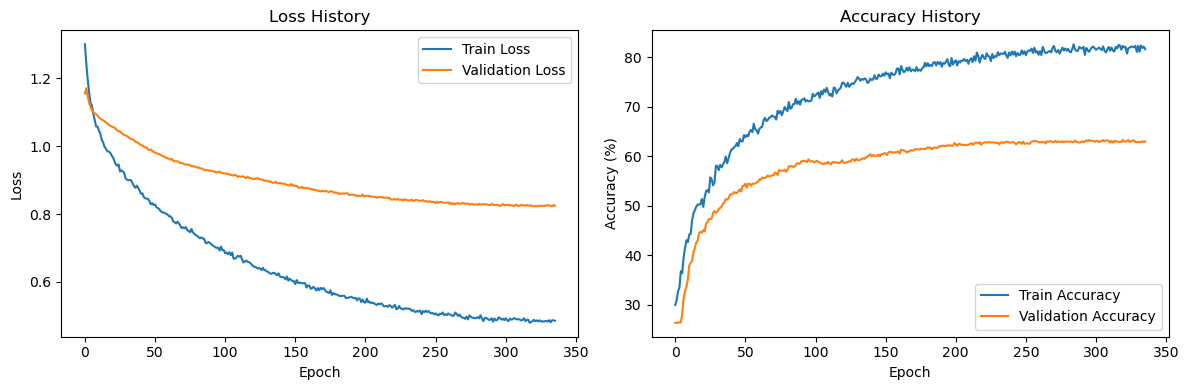

Early stopping at epoch 375


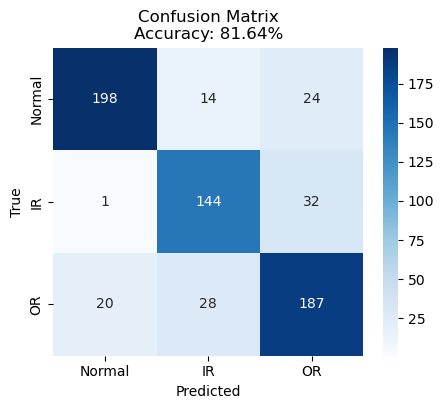

 - Model accuracy: 81.64%


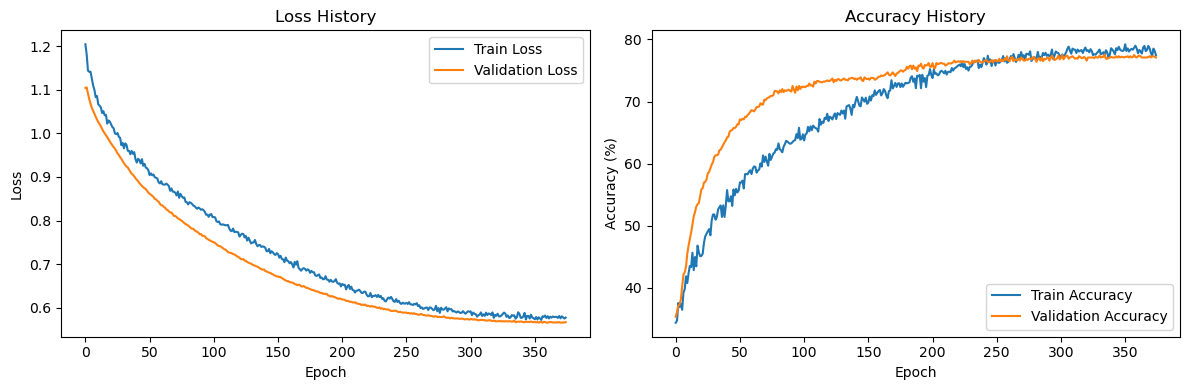

Early stopping at epoch 267


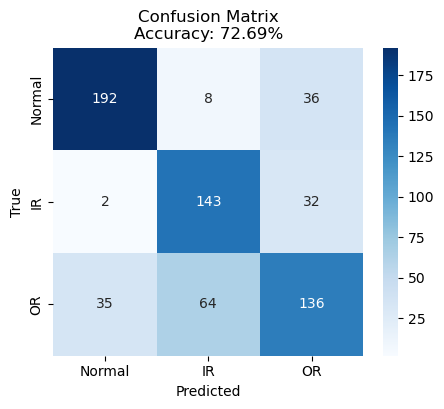

 - Model accuracy: 72.69%


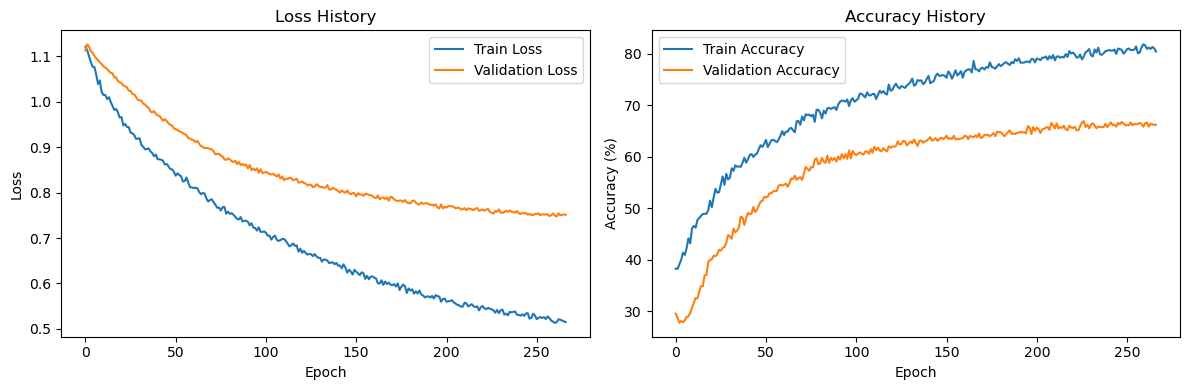

Early stopping at epoch 335


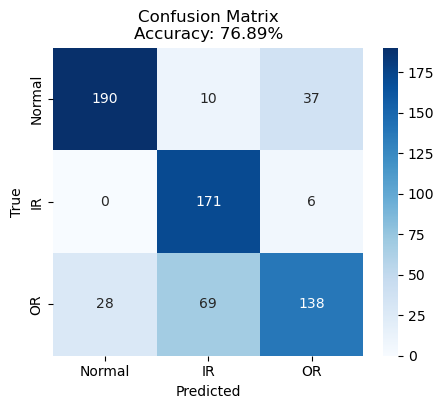

 - Model accuracy: 76.89%


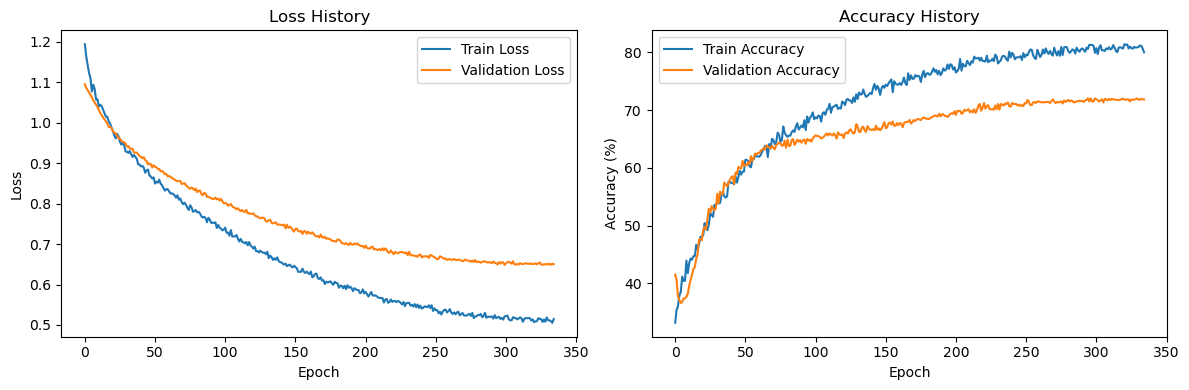

Early stopping at epoch 326


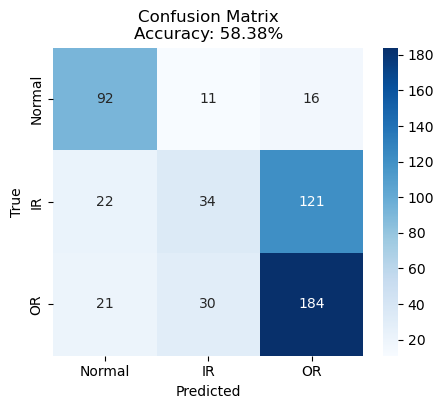

 - Model accuracy: 58.38%


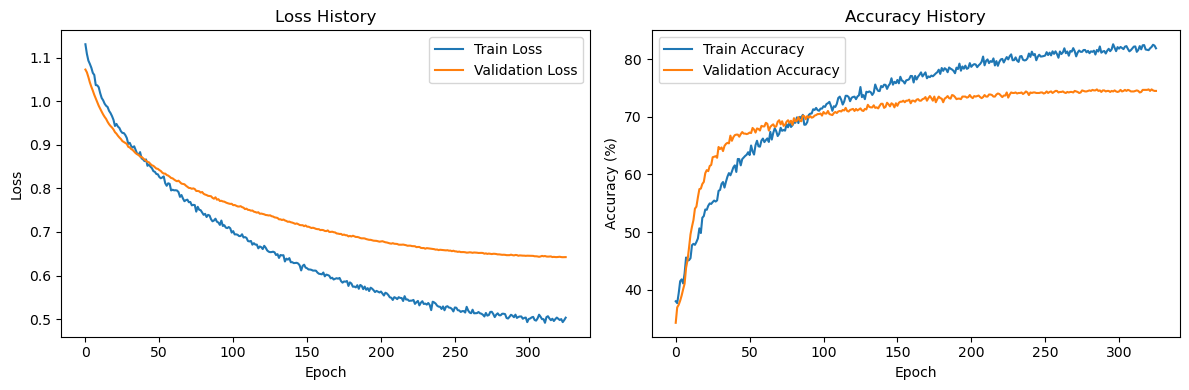

Early stopping at epoch 368


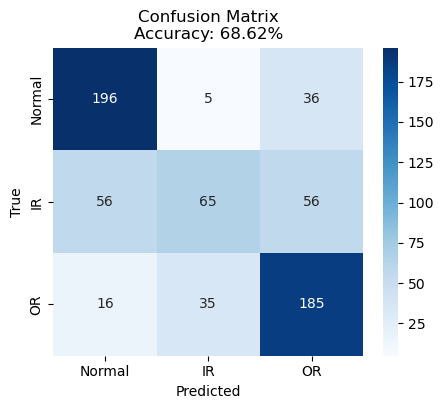

 - Model accuracy: 68.62%


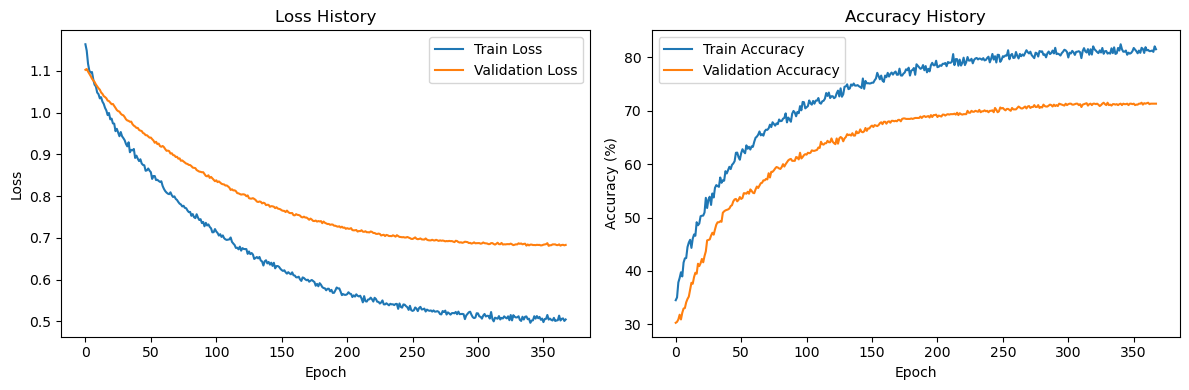

Early stopping at epoch 380


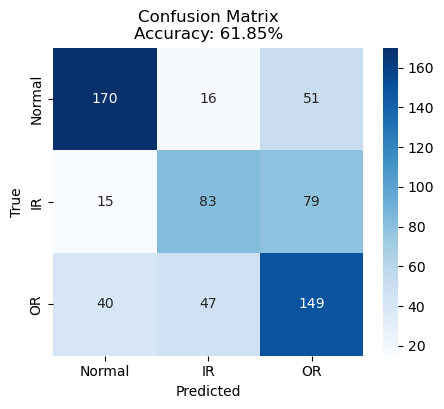

 - Model accuracy: 61.85%


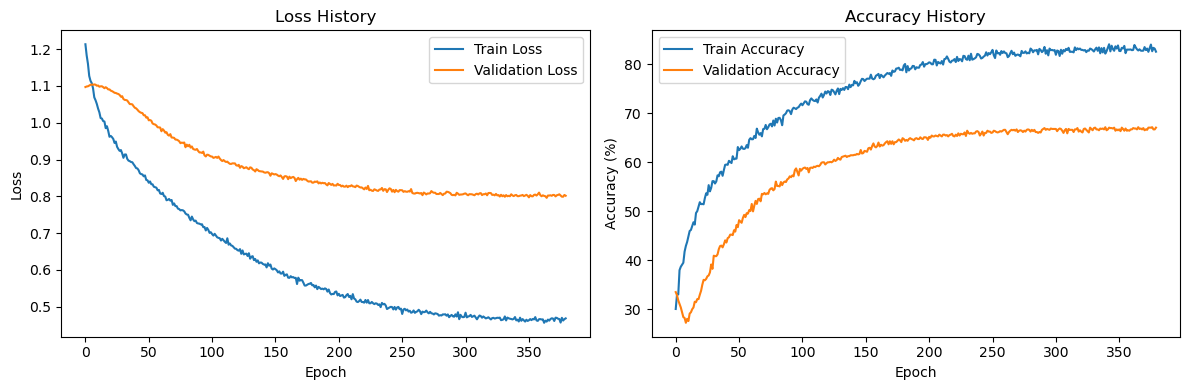

Early stopping at epoch 371


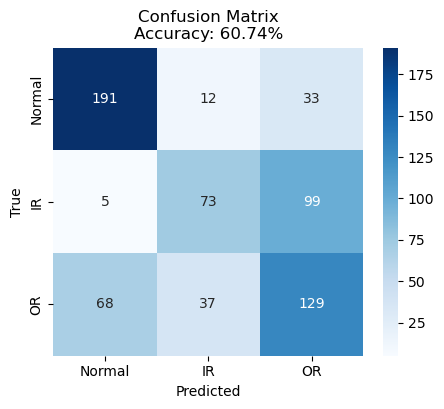

 - Model accuracy: 60.74%


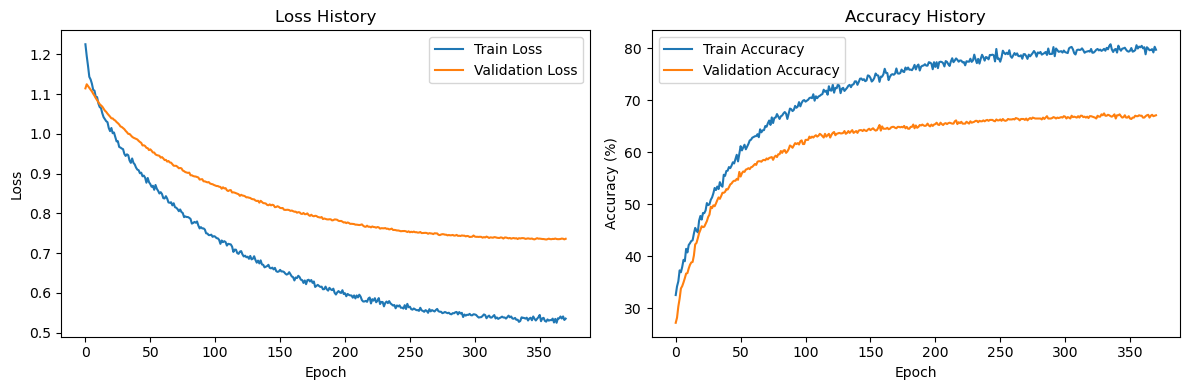

Early stopping at epoch 311


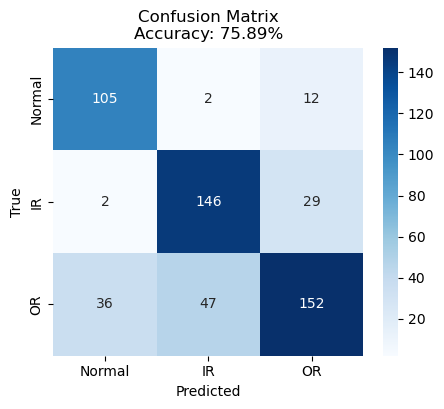

 - Model accuracy: 75.89%


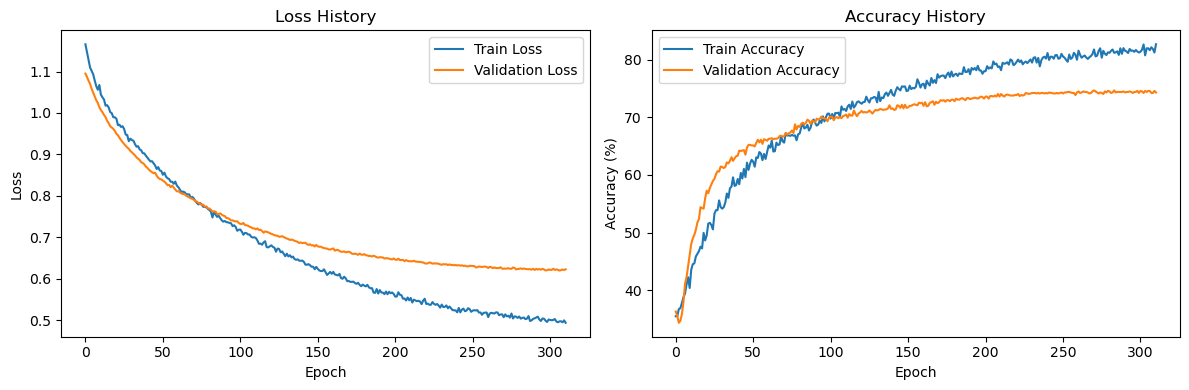

Early stopping at epoch 387


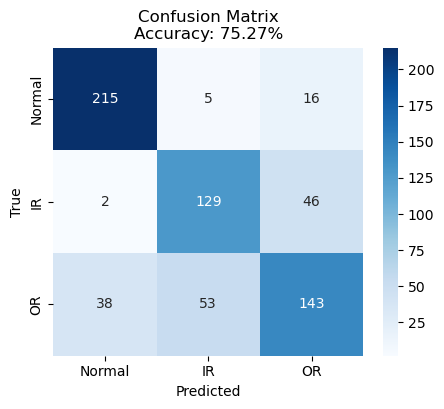

 - Model accuracy: 75.27%


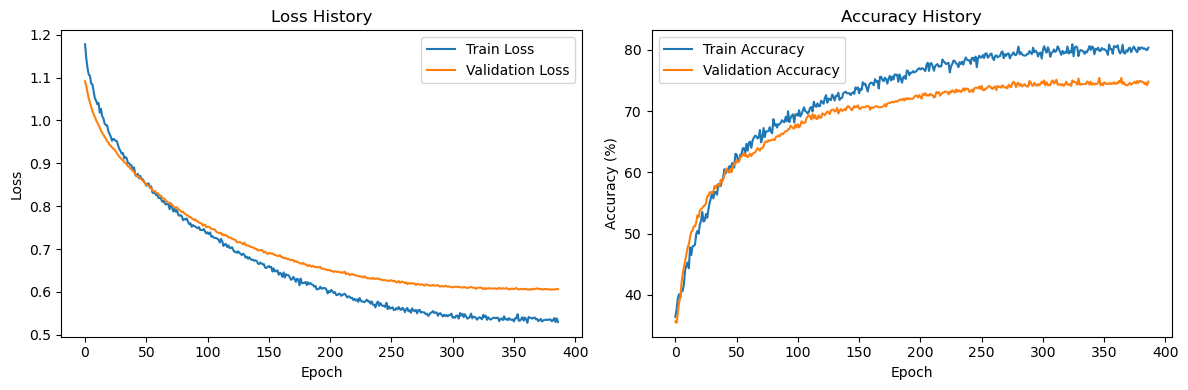

Early stopping at epoch 335


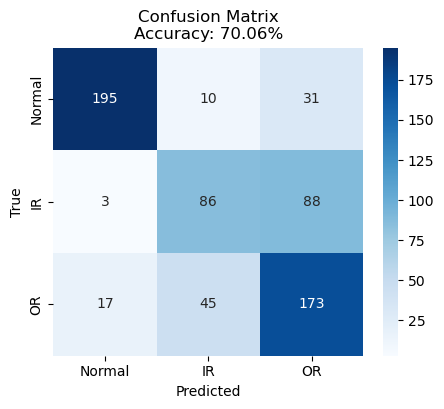

 - Model accuracy: 70.06%


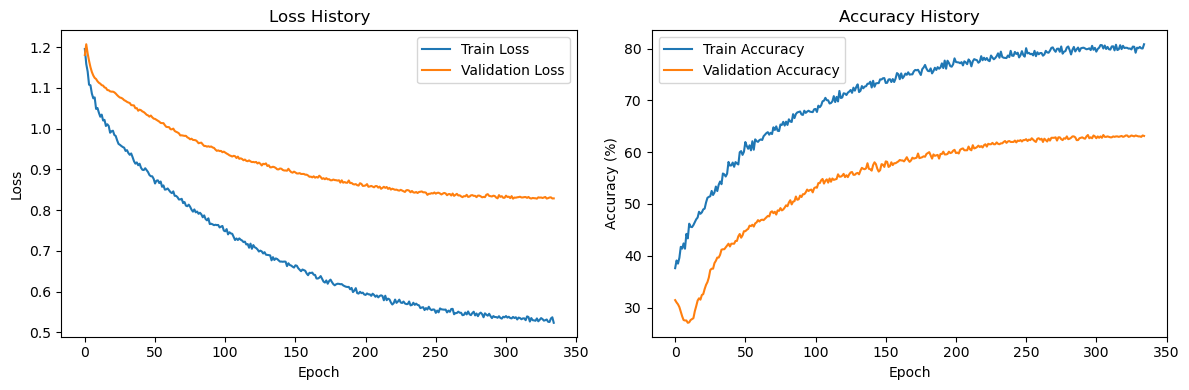

Early stopping at epoch 283


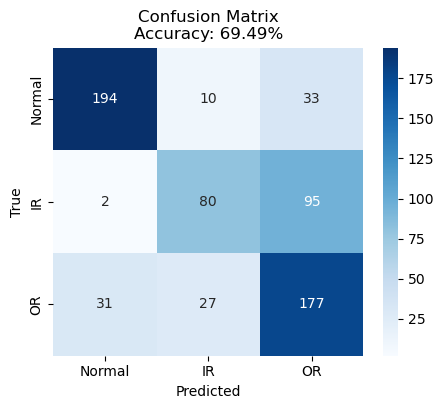

 - Model accuracy: 69.49%


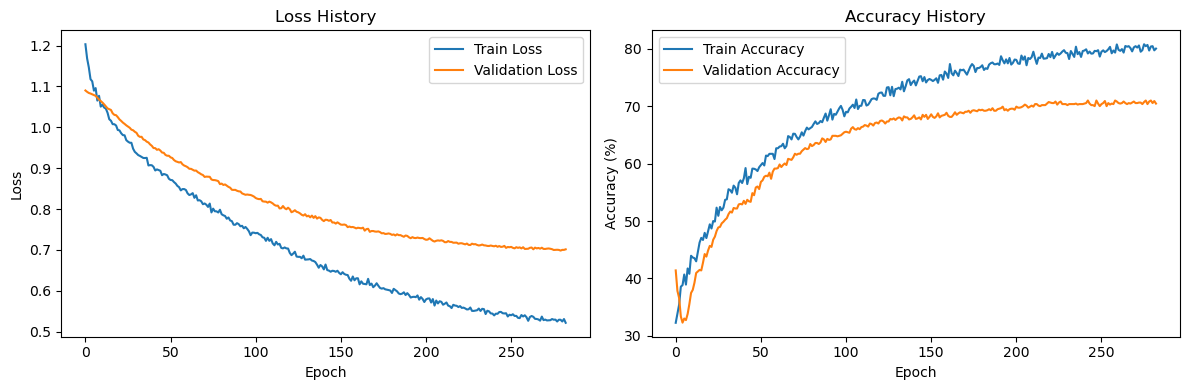

Early stopping at epoch 335


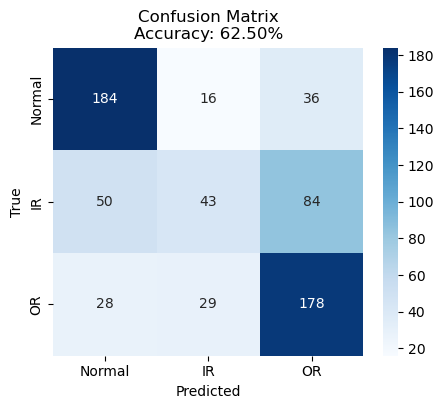

 - Model accuracy: 62.50%


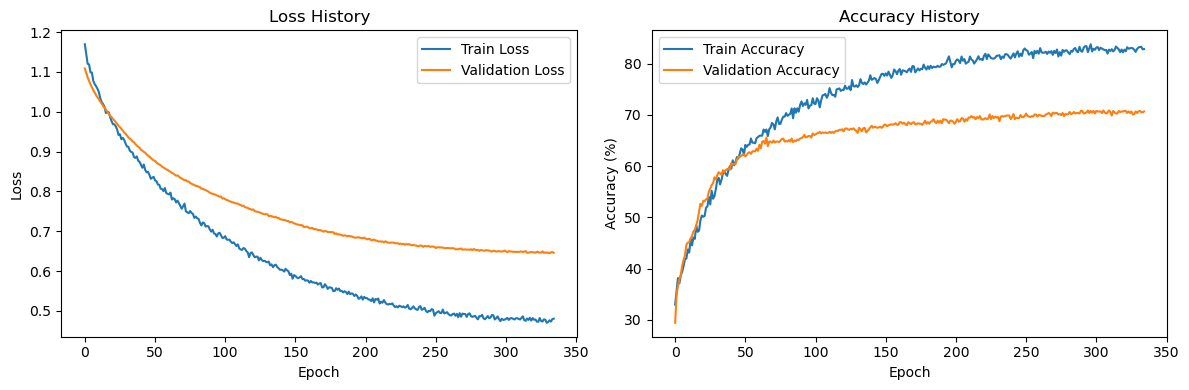

Early stopping at epoch 254


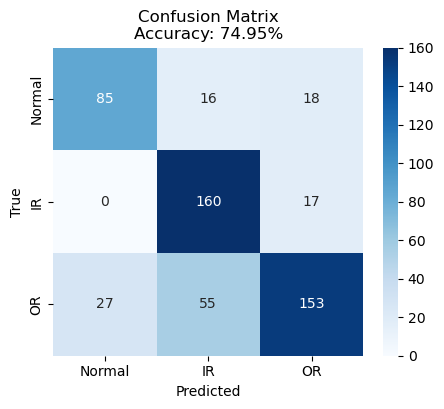

 - Model accuracy: 74.95%


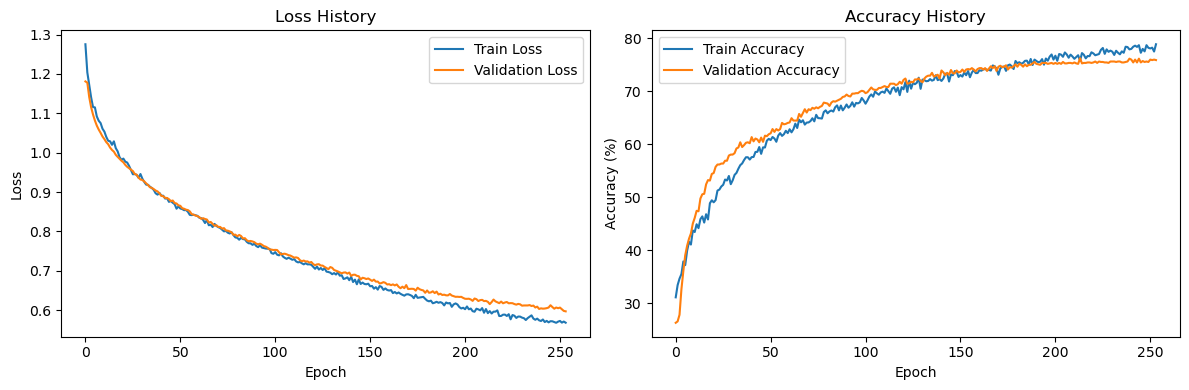

Early stopping at epoch 347


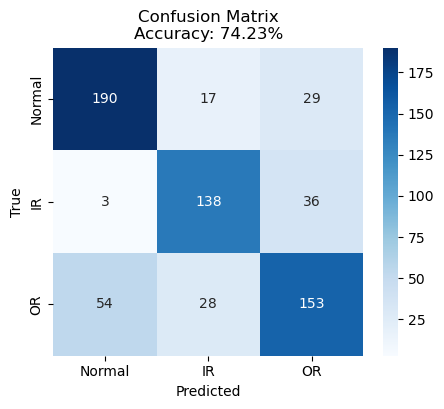

 - Model accuracy: 74.23%


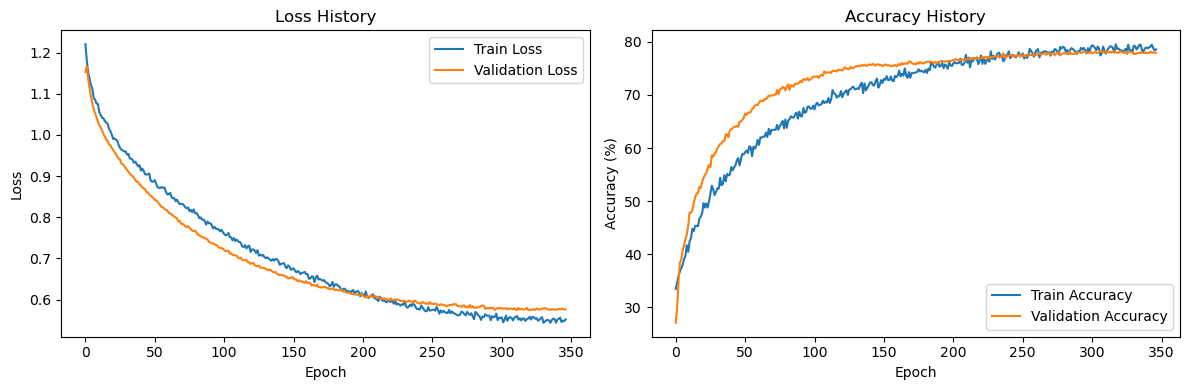

Early stopping at epoch 321


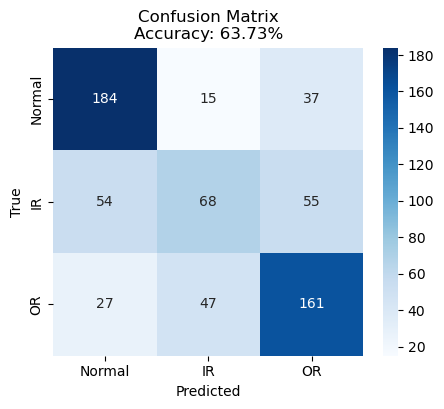

 - Model accuracy: 63.73%


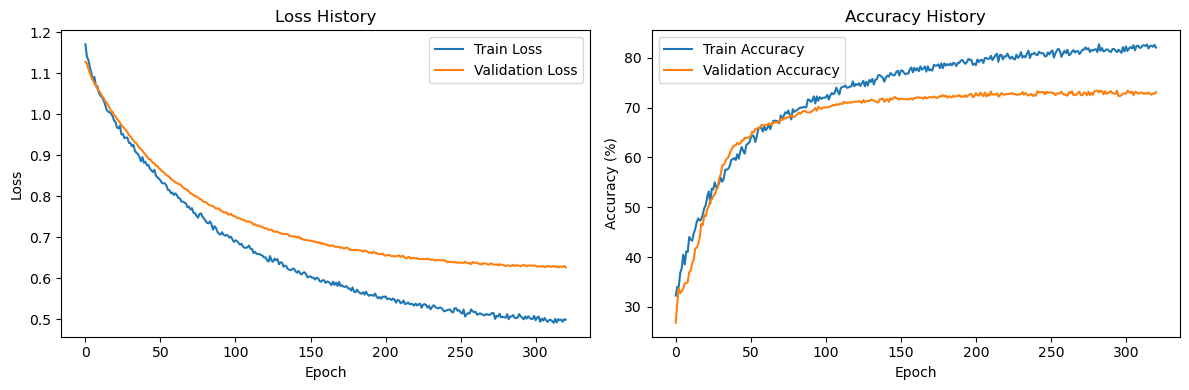

Early stopping at epoch 223


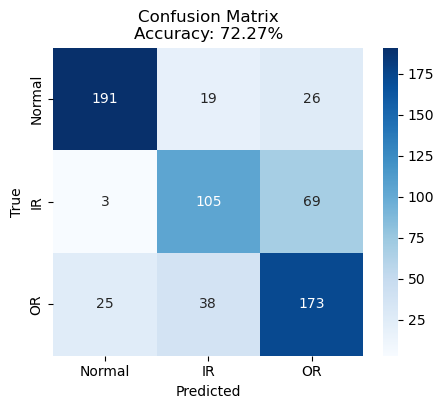

 - Model accuracy: 72.27%


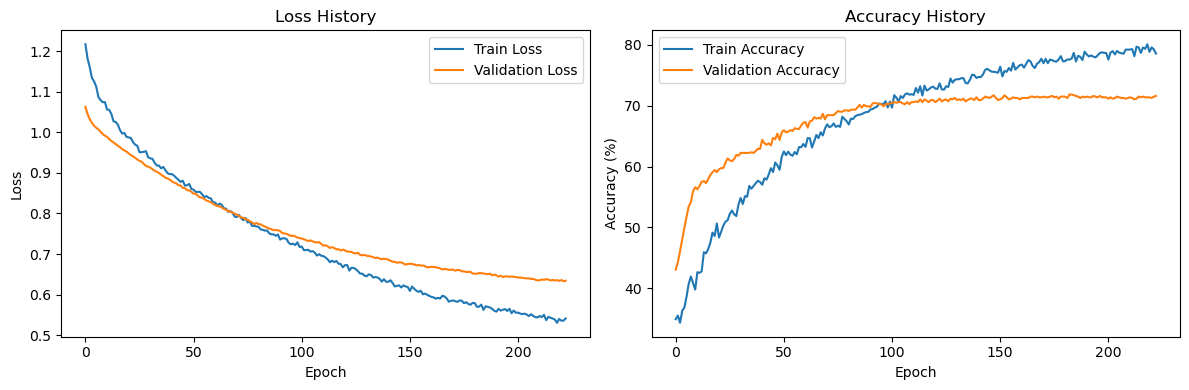

Early stopping at epoch 321


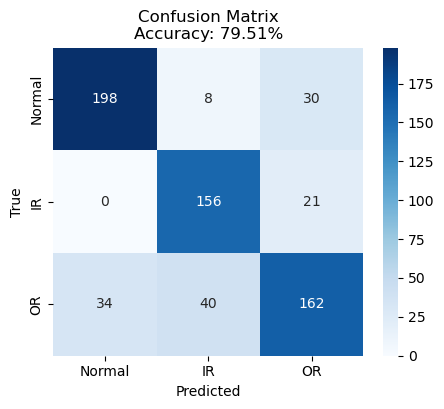

 - Model accuracy: 79.51%


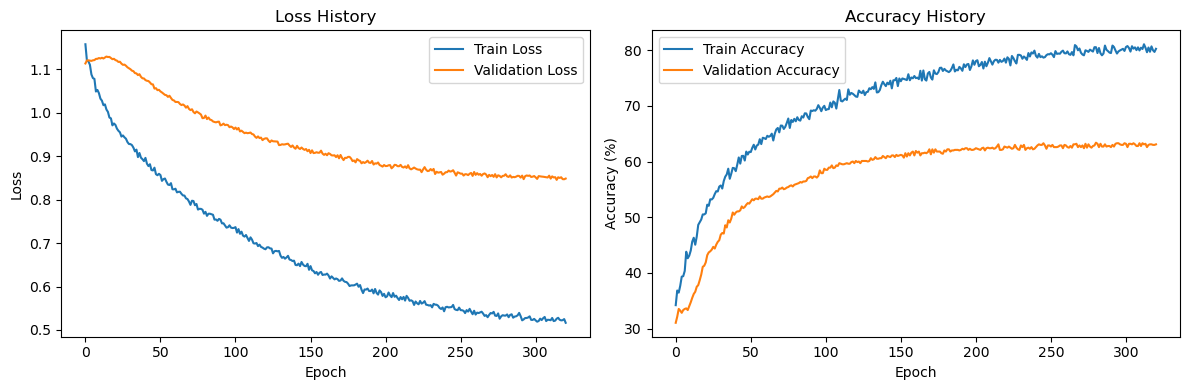

Early stopping at epoch 267


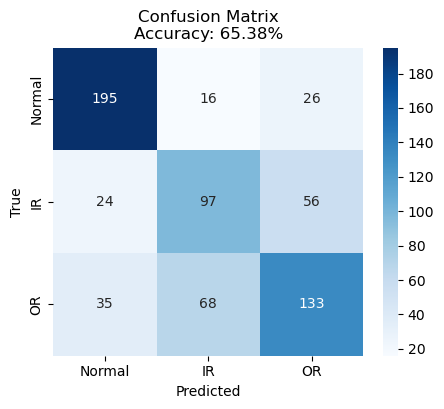

 - Model accuracy: 65.38%


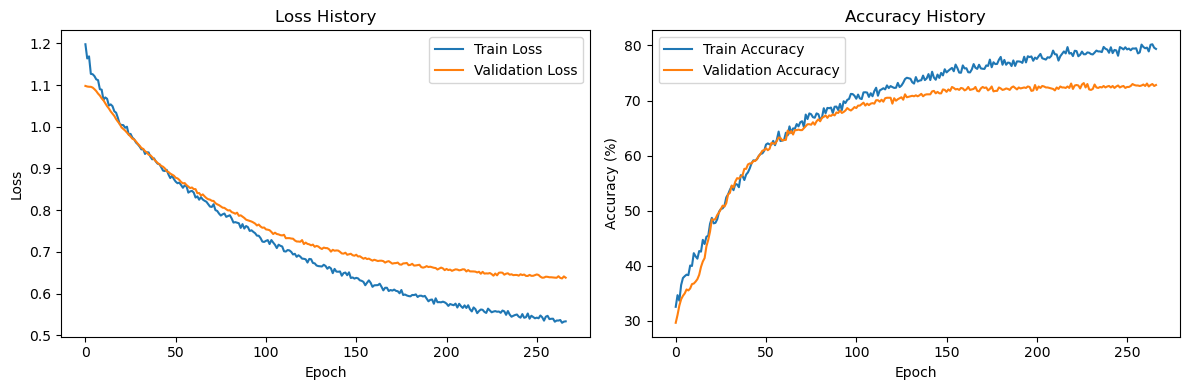

Early stopping at epoch 354


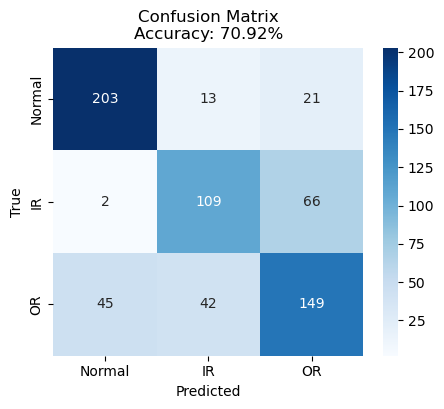

 - Model accuracy: 70.92%


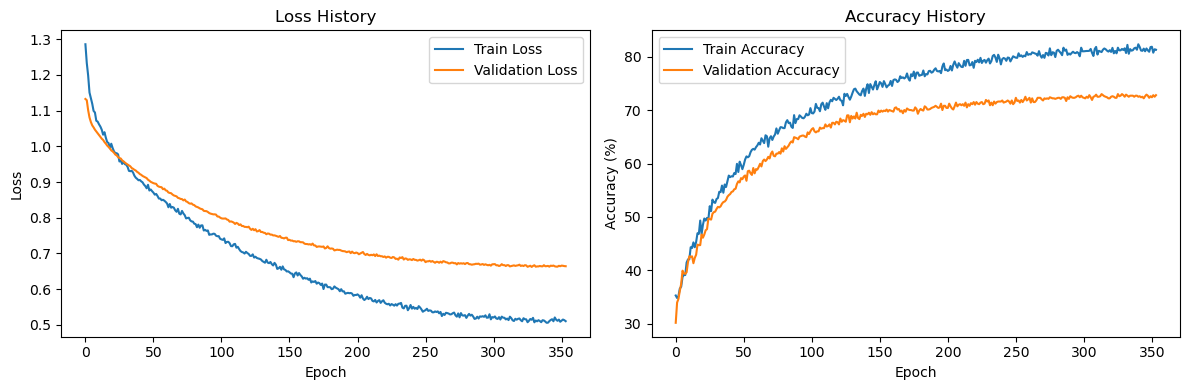

Early stopping at epoch 322


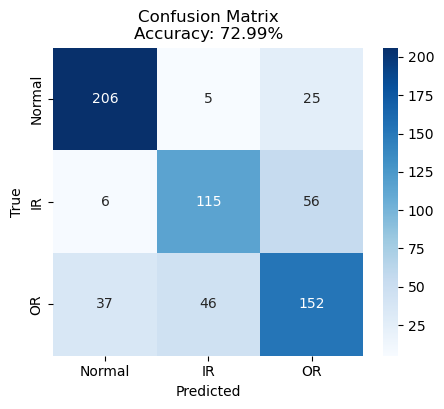

 - Model accuracy: 72.99%


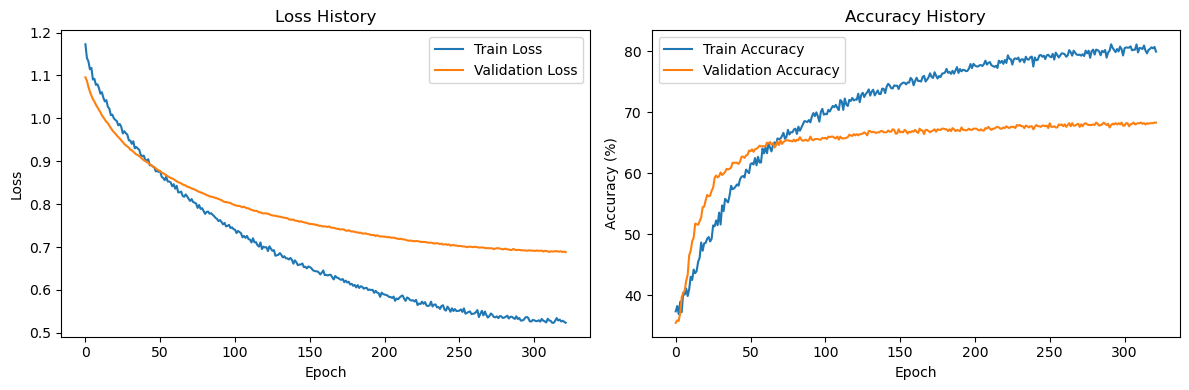

Early stopping at epoch 322


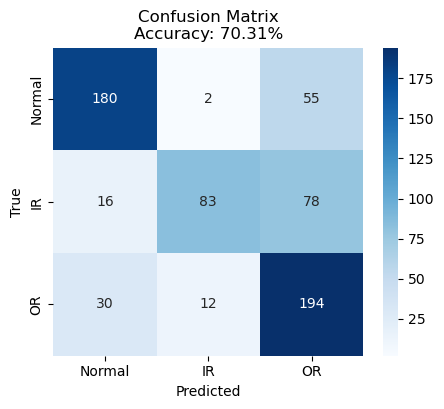

 - Model accuracy: 70.31%


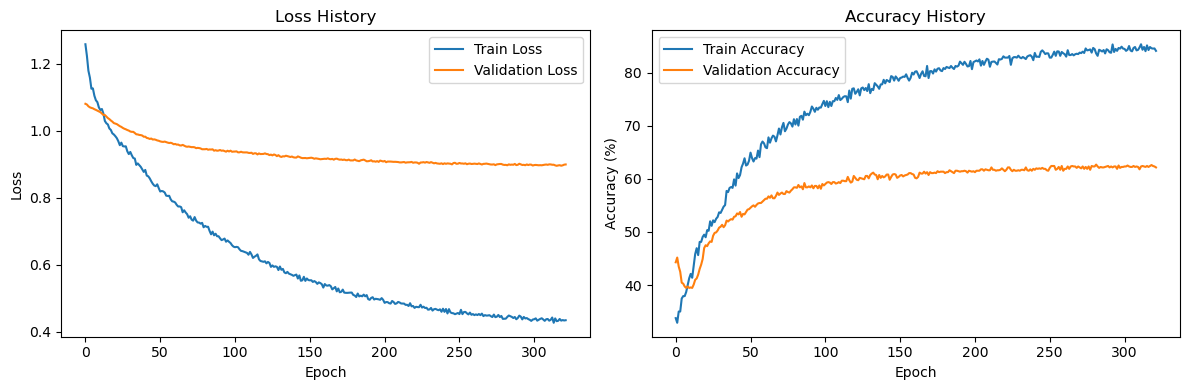

Early stopping at epoch 316


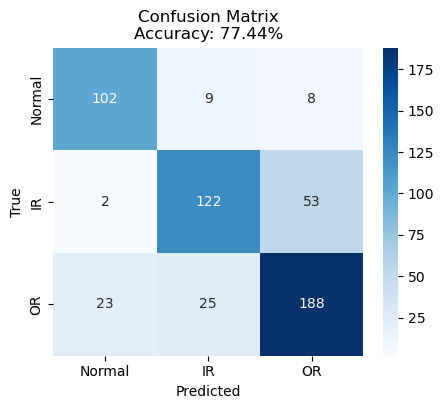

 - Model accuracy: 77.44%


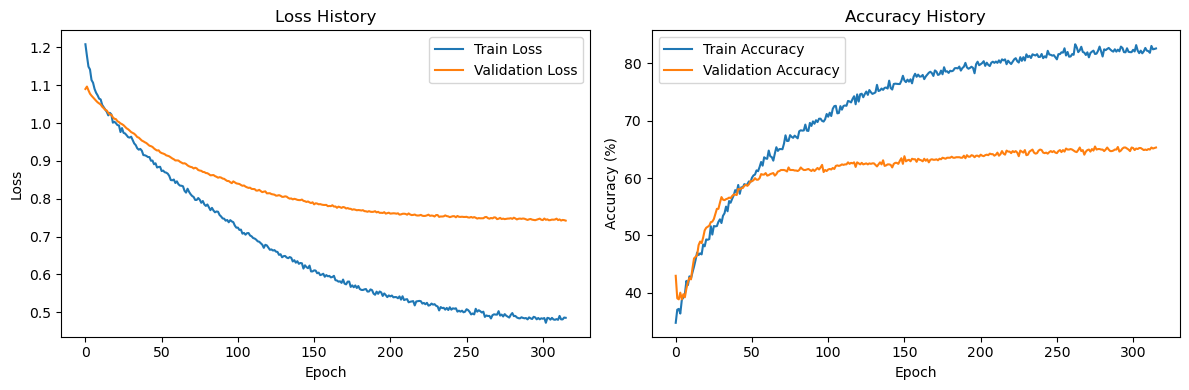

Early stopping at epoch 314


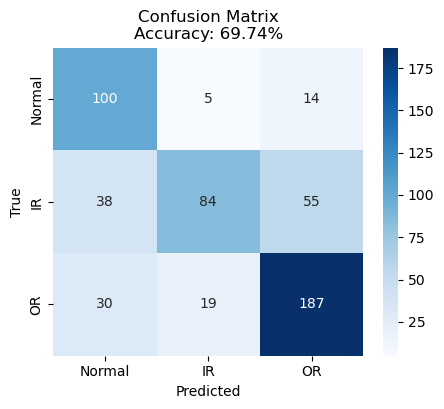

 - Model accuracy: 69.74%


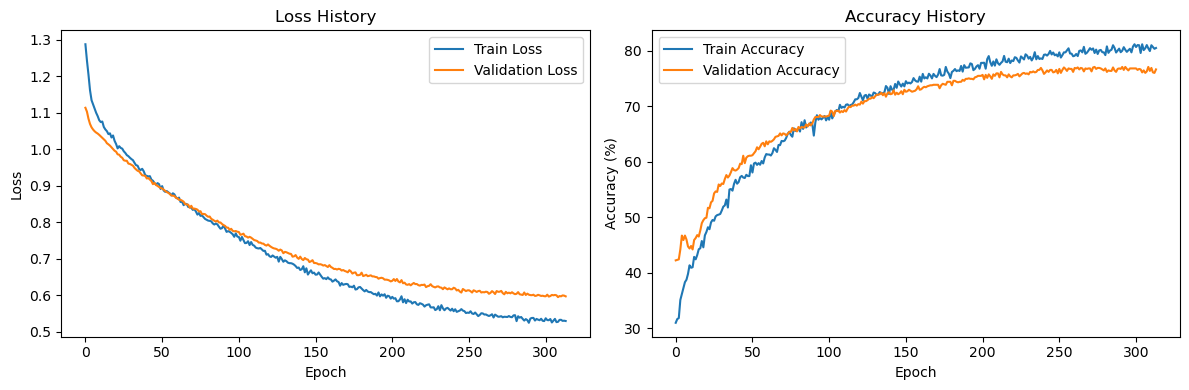

Mean accuracy: 0.699656332632058
Std accuracy: 0.06319586710082241


In [1]:
import cfg
from src import data_loader as data_loader, models, trainer, evaluate, preprocessing
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
import numpy as np

accuracy_list = []

for i in range(30):
    trainer.set_seed(i)

    X_train, Y_train, X_val, Y_val, X_test, Y_test, test_files, len_processed = data_loader.data_import(cfg, 500)

    scaler = preprocessing.DataScaler(method='power')
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    train_loader, val_loader, test_loader = data_loader.create_dataloaders(X_train, Y_train, X_val, Y_val,X_test, Y_test, cfg, len_processed)

    model = models.Deeper1DCNN(1, cfg.NUM_CLASSES)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr= cfg.LEARNING_RATE) #weight_decay=1e-4
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max= cfg.NUM_EPOCHS, eta_min=cfg.LEARNING_RATE *1e-2)

    trained_model, history = trainer.train_model(model, train_loader, val_loader, criterion, optimizer, 'test.pth', scheduler, num_epochs=cfg.NUM_EPOCHS, device=cfg.DEVICE)

    accuracy = evaluate.plot_confusion_matrix(trained_model, test_loader, 'cpu', cfg.CLASS_NAMES)
    accuracy_list.append(accuracy)
    evaluate.plot_history(history)

print('='*20)
print('Mean accuracy:', np.mean(accuracy_list))
print('Std accuracy:', np.std(accuracy_list))